In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.datasets import cifar10
import seaborn as sns

# CIFAR-10

- cnn 딥러닝 학습
- 샘플이미지(test[0]) 분류확인
- confusion matrix
- f1 score
-https://www.cs.toronto.edu/~kriz/cifar.html


```label:
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck
```

In [2]:
cifar10 = cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

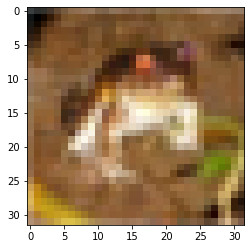

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)

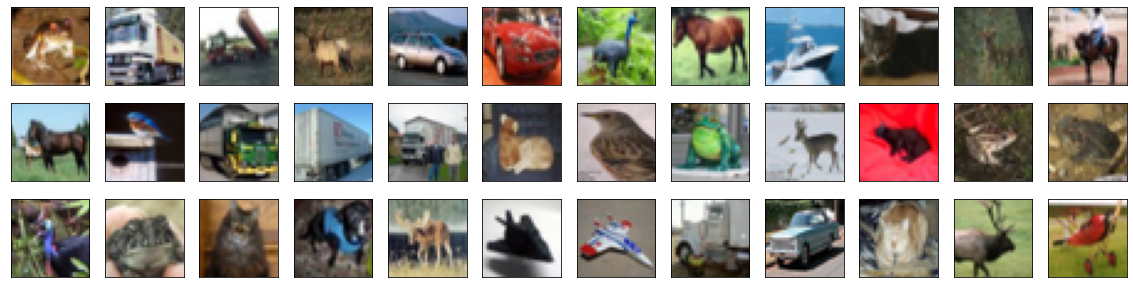

In [6]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

## 스케일링

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
y_trainOne=to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# 2 conv layer, 1 pooling layer
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(32,32,3), activation='relu', padding='same' )) # 최종: 26, 26 사이즈
# input_size= 흑백이라서 1 주기. 28, 28, 1 
model.add(Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())          

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # 1주고, sparse_categorical 줘도 됨 
          
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
h=model.fit(x_train, y_trainOne, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3808 - acc: 0.5036
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9925 - acc: 0.6537
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8476 - acc: 0.7052
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7475 - acc: 0.7395
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6606 - acc: 0.7697
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5700 - acc: 0.8012
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.4846 - acc: 0.8324
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4055 - acc: 0.8576
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3415 - acc: 0.8811 1s - loss
Epoch 10/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.2820 - acc: 0.9008

In [12]:
h.history.keys()

dict_keys(['loss', 'acc'])

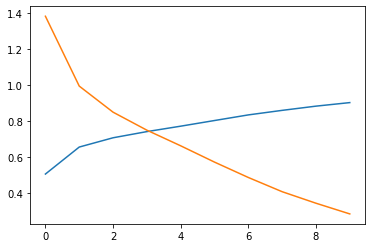

In [13]:
plt.plot(h.history['acc'])
plt.plot(h.history['loss'])

In [14]:
# y_loss = h.history['loss']
# x_len = numpy.arange(len(y_loss))
# plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

## 예측

In [15]:
model.predict(x_test[0].reshape(1,32,32,3))

array([[3.6125232e-07, 1.5888524e-08, 3.8596377e-07, 9.9914157e-01,
        4.8159208e-08, 8.5727166e-04, 2.9111885e-07, 4.2480755e-11,
        1.4934772e-08, 2.2327912e-08]], dtype=float32)

In [16]:
model.predict(x_test[0].reshape(1,32,32,3)).argmax(axis=1)

array([3], dtype=int64)

## 정확도

In [43]:
model.evaluate(x_train,y_trainOne)  # overfitting

In [18]:
y_testOne=to_categorical(y_test)
y_testOne
model.evaluate(x_test,y_testOne)

313/313 [==============================] - 2s 8ms/step - loss: 1.4516 - acc: 0.6565


[1.4515877962112427, 0.656499981880188]

## f1-score

In [19]:
f1_score(y_test, model.predict( x_test.reshape(-1,32,32,3)).argmax(axis=1), average='macro')

0.6554147681943094

## confusion matrix

In [20]:
CM_train = confusion_matrix(y_train, model.predict( x_train.reshape(-1,32,32,3)).argmax(axis=1))
CM_train

array([[4782,   32,   55,   15,   36,    1,    3,    6,   54,   16],
       [  29, 4926,    3,    2,    2,    0,    0,    1,   13,   24],
       [ 100,    6, 4502,   49,  256,   15,   22,   27,   14,    9],
       [  44,   18,   97, 4322,  254,   88,   55,   83,   20,   19],
       [  37,    7,   53,   25, 4814,    8,    8,   37,    6,    5],
       [  16,   16,   73,  426,  199, 4120,   22,  103,    9,   16],
       [  18,   15,   90,   65,  201,    3, 4590,    2,    4,   12],
       [  33,    9,   23,   26,  174,    6,    1, 4707,    7,   14],
       [  68,   11,    7,    4,   10,    1,    1,    2, 4888,    8],
       [  49,  106,    3,    7,    7,    1,    1,    4,   37, 4785]],
      dtype=int64)

In [21]:
CM_test = confusion_matrix(y_test, model.predict( x_test.reshape(-1,32,32,3)).argmax(axis=1))
CM_test

array([[733,  34,  54,  17,  43,   4,   7,  10,  66,  32],
       [ 45, 792,   7,  17,   5,   1,   3,   5,  26,  99],
       [ 87,  11, 519,  71, 137,  53,  44,  51,  16,  11],
       [ 33,  24,  77, 459, 127, 123,  52,  57,  23,  25],
       [ 28,   6,  65,  55, 715,  18,  29,  63,  14,   7],
       [ 25,   6,  72, 229,  87, 461,  21,  72,  14,  13],
       [ 12,  12,  68,  70, 112,  23, 674,  10,  11,   8],
       [ 23,   9,  31,  40, 128,  38,  10, 700,   3,  18],
       [ 77,  51,  13,  12,  12,   5,   4,   8, 785,  33],
       [ 37, 132,   7,  20,  17,   1,   2,  20,  37, 727]], dtype=int64)

## test- confusion matrix

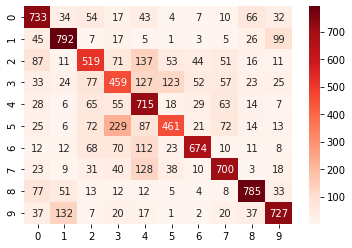

In [22]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test).argmax(axis=1)),
            annot=True, cmap='Reds',fmt = 'd');

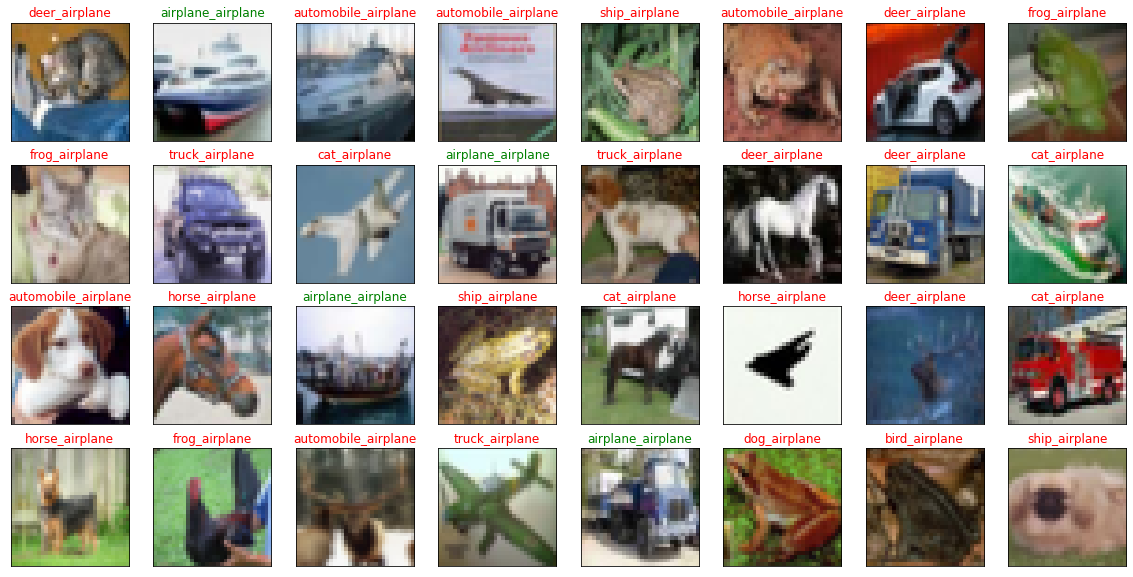

In [23]:
pred = model.predict(x_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(x_test[i])
    
    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(y_test[idx])
    
    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')

# CNN 성능 향상 위한 방법

## imageDataGenerator 사용, 증강

In [25]:
gen=image.ImageDataGenerator(rotation_range=20, shear_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [26]:
augment_ratio=1.5 #전체 데이터의 150%
augment_size=int(augment_ratio* x_train.shape[0])

randidx=np.random.randint(x_train.shape[0], size=augment_size)

In [27]:
x_augmented=x_train[randidx].copy()
y_augmented=y_train[randidx].copy()

In [29]:
x_augmented, y_augmented=gen.flow(x_augmented, y_augmented, batch_size=augment_size, shuffle=False).next() # 보강할 이미지 데이터생성


In [30]:
x_train=np.concatenate( (x_train, x_augmented))
y_train=np.concatenate( (y_train, y_augmented))

In [31]:
# 보강된 학습데이터, 정답 데이터 random 섞음 
s=np.arange(x_train.shape[0])
np.random.shuffle(s)

In [32]:
x_train=x_train[s]
y_train=y_train[s]

## 모델 구축 및 학습

In [37]:
# 4 conv layer, 2 pooling layer
# 드랍아웃을 해주지 말아야겠다...: 수현이 드랍아웃 없이 74% 
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same' )) # 최종: 26, 26 사이즈
model.add(Conv2D(32, kernel_size=(3,3), activation='relu' ,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 


model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same' ))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu' ,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())          

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units=10, activation='softmax')) # 1주고, sparse_categorical 줘도 됨 
          
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
h=model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
3907/3907 [==============================] - 197s 50ms/step - loss: 1.7437 - acc: 0.3537
Epoch 2/10
3907/3907 [==============================] - 197s 50ms/step - loss: 1.4080 - acc: 0.4960
Epoch 3/10
3907/3907 [==============================] - 196s 50ms/step - loss: 1.2845 - acc: 0.5488
Epoch 4/10
3907/3907 [==============================] - 192s 49ms/step - loss: 1.1970 - acc: 0.5852
Epoch 5/10
3907/3907 [==============================] - 188s 48ms/step - loss: 1.1386 - acc: 0.6098
Epoch 6/10
3907/3907 [==============================] - 190s 49ms/step - loss: 1.0874 - acc: 0.6300
Epoch 7/10
3907/3907 [==============================] - 181s 46ms/step - loss: 1.0472 - acc: 0.6466
Epoch 8/10
3907/3907 [==============================] - 183s 47ms/step - loss: 1.0163 - acc: 0.6572
Epoch 9/10
3907/3907 [==============================] - 193s 49ms/step - loss: 0.9909 - acc: 0.6693
Epoch 10/10
3907/3907 [==============================] - 194s 50ms/step - loss: 0.9622 - acc: 0.6783

## 평가

In [40]:
model.evaluate(x_test,y_test) # 언더피팅....... 

313/313 [==============================] - 3s 9ms/step - loss: 0.7148 - acc: 0.7576


[0.7148020267486572, 0.7576000094413757]

KeyError: 'val_acc'

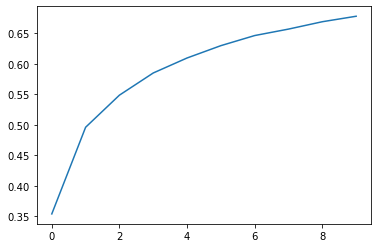

In [41]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

KeyError: 'val_loss'

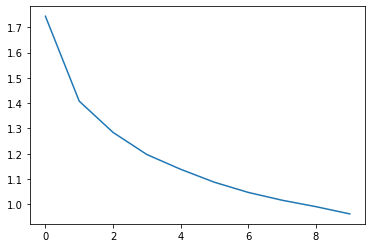

In [42]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

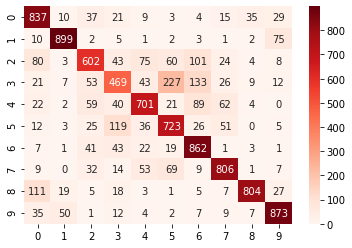

In [44]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test).argmax(axis=1)),
            annot=True, cmap='Reds',fmt = 'd');